In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [19]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [24]:
month = date(2021, 12, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2021, 12, 1), datetime.date(2021, 12, 31))

In [25]:
bom
eom

datetime.date(2021, 12, 1)

datetime.date(2021, 12, 31)

In [4]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2021-12-31" 
ORDER BY amount DESC



In [5]:
df = pd.read_sql(sql, conn)
df

,date,amount,item,kind
0,2021-12-31,10000,Parent,Parent
1,2021-12-31,640,Internet Home,Communication
2,2021-12-31,600,CCF,Luxury
3,2021-12-31,340,Packt,Edutainment
4,2021-12-31,320,Telephone Dtac,Communication
5,2021-12-31,190,Monthly Prime,Movies
6,2021-12-31,170,Google,Edutainment
7,2021-12-31,100,Apple,Edutainment
8,2021-12-31,70,Patreon,Edutainment
9,2021-12-31,40,Apple,Edutainment


In [6]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2021-12-31" 
ORDER BY amount DESC



In [7]:
df_eom = pd.read_sql(sql, conn)
df_eom

,date,amount,item,kind
0,2021-12-31,10000,Parent,Parent
1,2021-12-31,640,Internet Home,Communication
2,2021-12-31,600,CCF,Luxury
3,2021-12-31,340,Packt,Edutainment
4,2021-12-31,320,Telephone Dtac,Communication
5,2021-12-31,190,Monthly Prime,Movies
6,2021-12-31,170,Google,Edutainment
7,2021-12-31,100,Apple,Edutainment
8,2021-12-31,70,Patreon,Edutainment
9,2021-12-31,40,Apple,Edutainment


In [8]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2021-12-01" AND "2021-12-31" 
ORDER BY date



In [9]:
df_t = pd.read_sql(sql, conn)
df_t.head()

,date,amount,item,kind
0,2021-12-06,550,Food,Food
1,2021-12-06,170,Transportation,Transportation
2,2021-12-08,1750,Pets,Pets
3,2021-12-10,1020,Food,Food
4,2021-12-17,720,Personal Care,Apparel


In [10]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple                  140
Books & Software       910
CCF                    600
Food                  3800
Fuel                  1110
Google                 170
Internet Home          640
Medicine              3260
Monthly Prime          190
Packt                  340
Parent               10000
Patreon                 70
Personal Care          720
Pets                  4430
Telephone Dtac         320
Transportation         170
Vehicle             100000
Name: amount, dtype: int64

In [11]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Apparel              720
Communication        960
Edutainment         1630
Food                3800
Luxury               600
Medicine            3260
Movies               190
Parent             10000
Pets                4430
Transportation    101280
Name: amount, dtype: int64

In [28]:
expense = grouped.amount.sum()
sum(expense)

126870

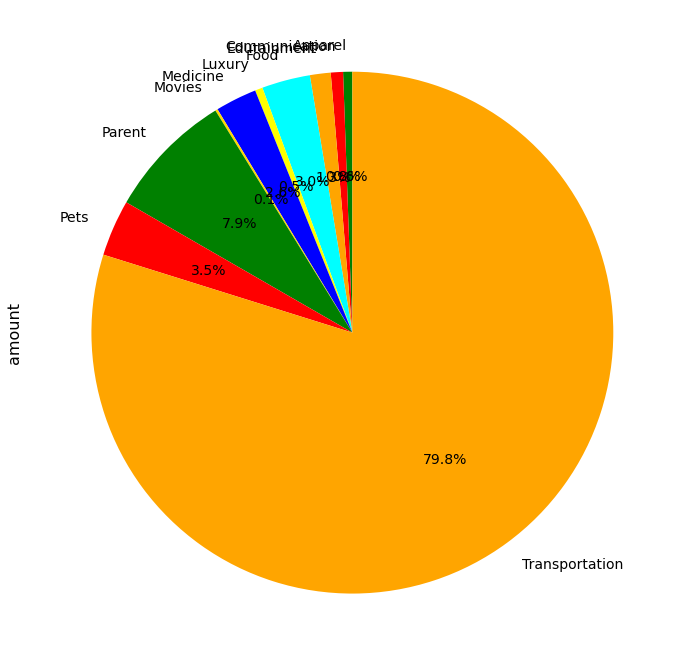

In [13]:
fig_path = "../fig/Expense-2112.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [14]:
expense.to_csv("../data/expense-2112.csv")

In [15]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2021-12-31" 
ORDER BY date



In [16]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [17]:
df_tmp.to_csv("../data/expense-eom.csv")